<a href="https://colab.research.google.com/github/VladSkopenko/DataScienceNotebooks/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx
import matplotlib.pyplot as plt

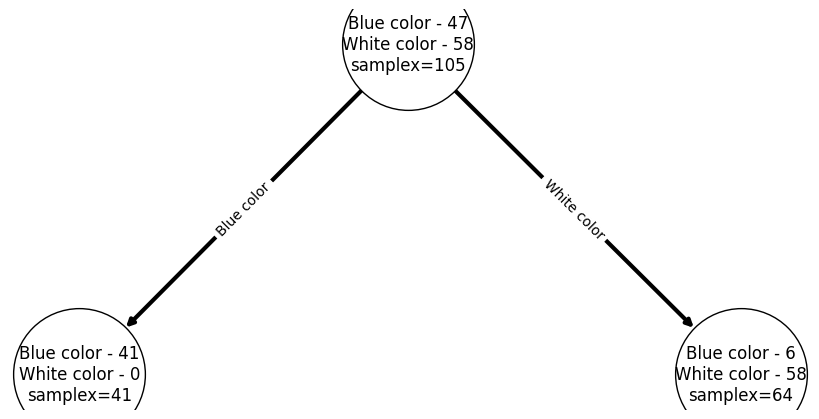

In [16]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

plt.figure(figsize=(8, 4))
g = nx.DiGraph()
root_node = "Blue color - 47\nWhite color - 58\nsamplex=105"
left_node = "Blue color - 41\nWhite color - 0\nsamplex=41"
right_node = "Blue color - 6\nWhite color - 58\nsamplex=64"

g.add_edges_from([(root_node, left_node), (root_node, right_node)])

options = {
    "node_color": "white",
    "node_size": 9000,
    "width": 3,
    "arrowstyle": "-|>",
    "edge_color": "k",
}
pos = graphviz_layout(g, prog="dot")
nx.draw(g, pos, with_labels = True, **options)
nx.draw_networkx_edge_labels(
    g,
    pos,
    edge_labels={
        (root_node, left_node): "Blue color",
        (root_node, right_node): "White color",
    }
)
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")

# Gini

In [11]:
parent_gini = 1 - ((47 / 105) ** 2 + ( 58 / 105) ** 2)
left_gini = 1 - (( 41 / 41) ** 2 + (0 / 41) ** 2)
rigth_gini = 1 - (( 6 / 64 ) ** 2 + ( 58 / 64) ** 2)

parent_gini, left_gini, rigth_gini

(0.49451247165532874, 0.0, 0.169921875)

Information Gain

In [12]:
inf_gain = parent_gini - left_gini * 41/105 - rigth_gini * 64/105
inf_gain

0.39094104308390015

# Entropy


In [19]:
import numpy as np

parent_entropy = - (47/105) * np.log2(47/105) - (58/105) * np.log2(58/105)
left_entropy = - (41/41) * np.log2(41/41) #- (0/41) * np.log2(0/41)  нельзя брать логарифм от 0
rigth_entropy = - (6/64) * np.log2(6/64) - (58/64) *  np.log2(58/64)

parent_entropy, left_entropy, rigth_entropy

(0.9920686248447118, -0.0, 0.4488644887230294)

Balance



In [21]:
balance = left_entropy * 41/105 + rigth_entropy * 64/105
parent_entropy - balance

0.7184750317182939